# 1. Import the necesarry packages

In [1]:
import glob
import os 
import tarfile
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import get_file

# 2. Define the URL

In [2]:
DATASET_URL = 'https://datashare.is.ed.ac.uk/bitstream/handle/10283/3192/CINIC-10.tar.gz?sequence=4&isAllowed=y'
DATA_NAME = 'cinic10'
FILE_EXTENSION = 'tar.gz'
FILE_NAME = '.'.join([DATA_NAME, FILE_EXTENSION])

# 3. Download and decompress the data

In [3]:
downloaded_file_location = get_file(origin=DATASET_URL, fname=FILE_NAME, extract=False)

data_directory, _ = downloaded_file_location.rsplit(os.path.sep, maxsplit=1)
data_directory = os.path.sep.join([data_directory, DATA_NAME])
tar = tarfile.open(downloaded_file_location)

if not os.path.exists(data_directory):
    tar.extractall(data_directory)
    

# 4. Load all image apths and print the number of images found

In [4]:
print(f'Data downloaded to {data_directory}')
data_pattern = os.path.sep.join([data_directory, '*\*\*.png'])

Data downloaded to C:\Users\hp\.keras\datasets\cinic10


In [5]:
image_paths = list(glob.glob(data_pattern))
print(f'There are {len(image_paths):,} images in the dataset')

There are 270,000 images in the dataset


# 5. Load a single image

In [6]:
sample_image = load_img(image_paths[0])
print(f'Image Type: {type(sample_image)}')
print(f'Image Format: {sample_image.format}')
print(f'Image Mode: {sample_image.mode}')
print(f'Image Size: {sample_image.size}')

Image Type: <class 'PIL.PngImagePlugin.PngImageFile'>
Image Format: PNG
Image Mode: RGB
Image Size: (32, 32)


# 6. Covert an image into array

In [7]:
sample_image_array = img_to_array(sample_image)
print(f'IMage Type: {type(sample_image_array)}')
print(f'Image Shape: {sample_image_array.shape}')

IMage Type: <class 'numpy.ndarray'>
Image Shape: (32, 32, 3)


# 7. Display an Image

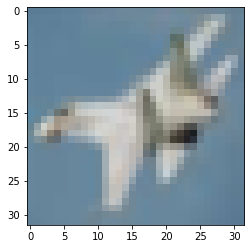

In [8]:
plt.imshow(sample_image_array / 255.0)

# 8. Load a batch of images

In [9]:
image_generator = ImageDataGenerator(horizontal_flip=True, rescale=1.0/255.0)

# 9. Display a random batch of 10 images

Found 270000 images belonging to 3 classes.


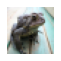

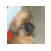

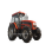

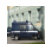

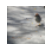

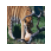

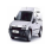

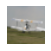

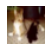

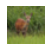

In [10]:
iterator = (image_generator.flow_from_directory(directory=data_directory, batch_size=10))

for batch, _ in iterator:
    plt.figure(figsize=(5,5))
    for index, image in enumerate(batch, start=1):
        ax = plt.subplot(5, 5, index)
        plt.imshow(image)
        plt.axis('off')
        plt.show()
    break